# NFL Capstone EDA

I will be using SQL to create dataframes of the various tables and combinations to perform EDA

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

## Connect to Database and create dataframes of each table to combine later

In [48]:
conn = sqlite3.connect('NFLstats.db')

In [124]:
teamyearsummarySQL_Query = pd.read_sql_query("SELECT * FROM 'teamyearsummary'", conn)
teamyearsummary = pd.DataFrame(teamyearsummarySQL_Query)

In [125]:
weeksSQL_Query = pd.read_sql_query("SELECT * FROM 'weeks'", conn)
weeks = pd.DataFrame(weeksSQL_Query)

In [126]:
draftSQL_Query = pd.read_sql_query("SELECT * FROM 'draft'", conn)
draft = pd.DataFrame(draftSQL_Query)

In [144]:
startersSQL_Query = pd.read_sql_query("SELECT * FROM 'starters'", conn)
starters = pd.DataFrame(startersSQL_Query)

### What is more correlated with the play selection of pass vs. run on offense, the team, head coach, offensive coordinator or offensive scheme?

In [34]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [35]:
coachcategories = teamyearsummary['coach']

In [36]:
measurements = teamyearsummary['Team_Pass_Att'] / teamyearsummary['Team_Rush_Att']

In [37]:
correlation_ratio(coachcategories, measurements)

0.6593252555250383

In [14]:
offcoorcategories = teamyearsummary['offcoor']

In [15]:
correlation_ratio(offcoorcategories, measurements)

0.6166873801011822

In [16]:
teamcategories = teamyearsummary['team']

In [17]:
correlation_ratio(teamcategories, measurements)

0.4418207167202797

In [18]:
offschemecategories = teamyearsummary['offscheme']

In [19]:
correlation_ratio(offschemecategories, measurements)

0.15518600252020634

### It seems that the head coach is most likely to correlate with the pass/run ratio

## Using a correlation module that incorporates categorical and numerical features, what features correlate the most?

### Article where correlation ratio function and dython packages were found here and installed from the documentation

https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

http://shakedzy.xyz/dython/

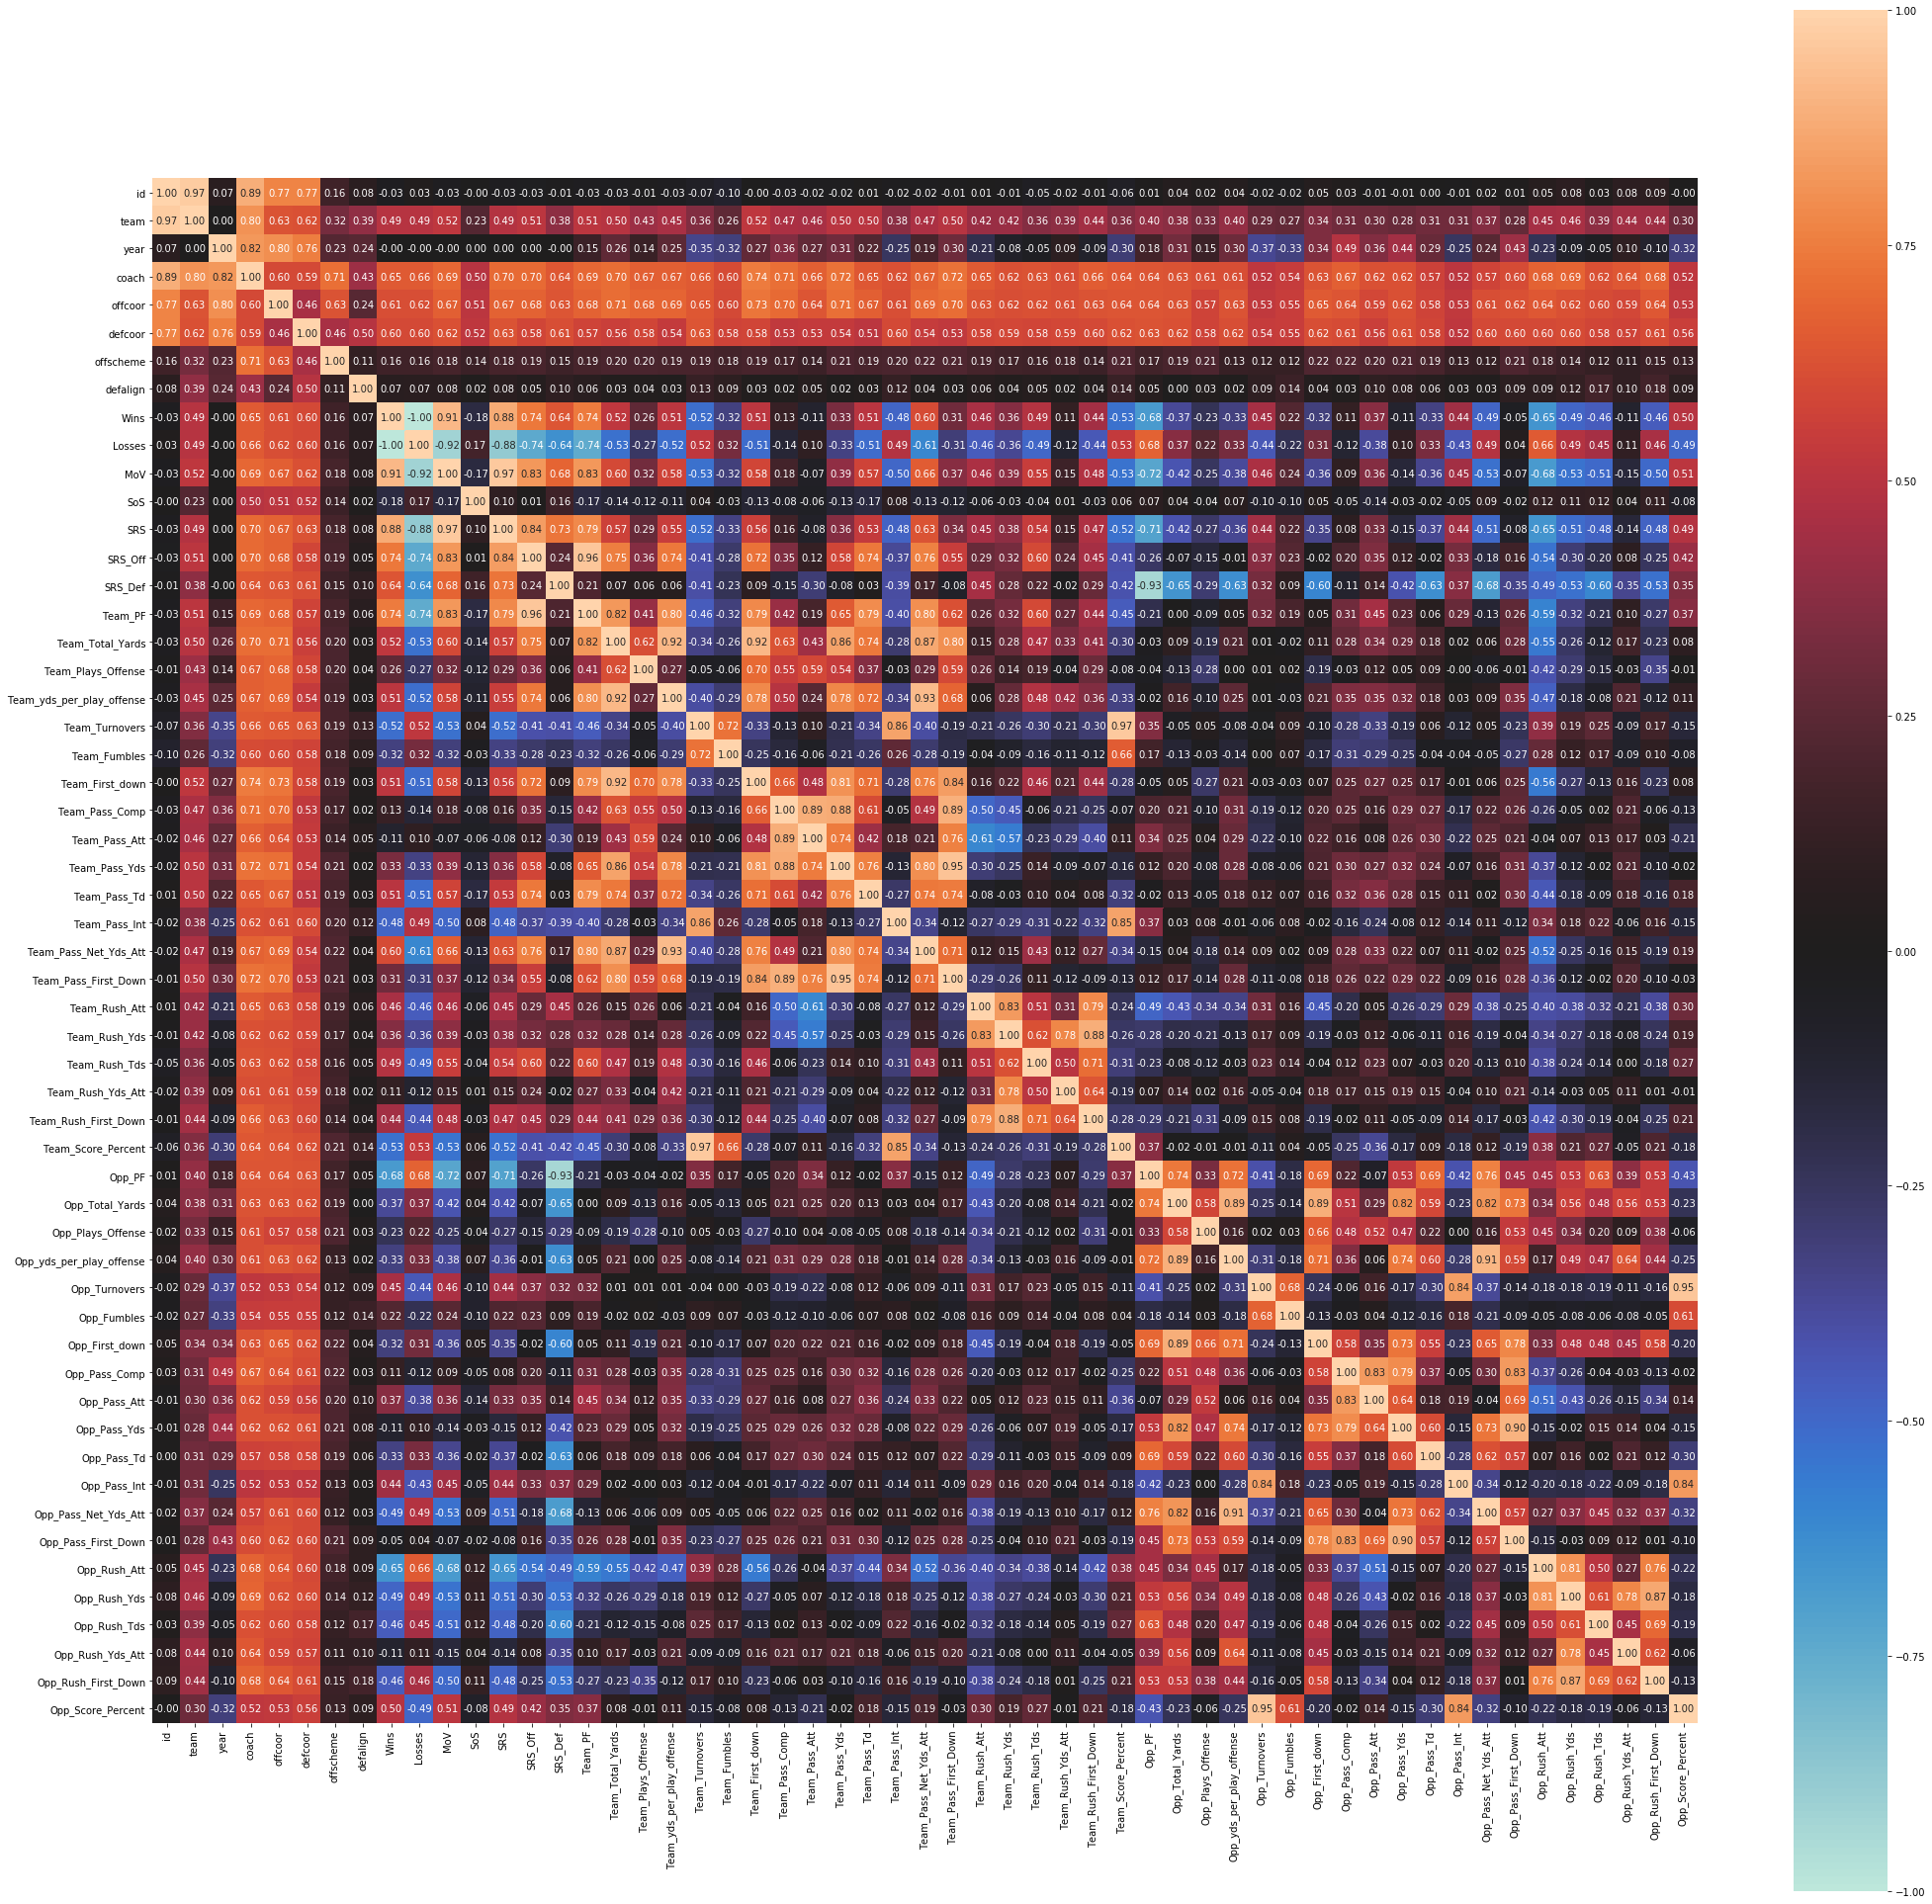

  0.595571   0.141626  0.039438  0.439680 -0.441274   
 Team_Score_Percent         0.620695   0.214141  0.138924 -0.527838  0.531896   
 Opp_PF                     0.629952   0.168500  0.054757 -0.679377  0.677415   
 Opp_Total_Yards            0.617983   0.190048  0.004155 -0.370194  0.367759   
 Opp_Plays_Offense          0.576596   0.208560  0.034682 -0.226929  0.221568   
 Opp_yds_per_play_offense   0.615978   0.132517  0.021165 -0.327766  0.327820   
 Opp_Turnovers              0.542336   0.123358  0.094579  0.446492 -0.443192   
 Opp_Fumbles                0.550259   0.123864  0.142451  0.222814 -0.221527   
 Opp_First_down             0.616989   0.218562  0.039652 -0.317757  0.312776   
 Opp_Pass_Comp              0.605972   0.223115  0.027695  0.113174 -0.119622   
 Opp_Pass_Att               0.559401   0.204678  0.098234  0.374985 -0.380944   
 Opp_Pass_Yds               0.612398   0.205574  0.082761 -0.107013  0.102848   
 Opp_Pass_Td                0.580429   0.190966  0.055

In [27]:
from dython.nominal import associations
associations(teamyearsummary, figsize=(35,35))

### How similar is the correlation between the team year summary and team week breakdown?

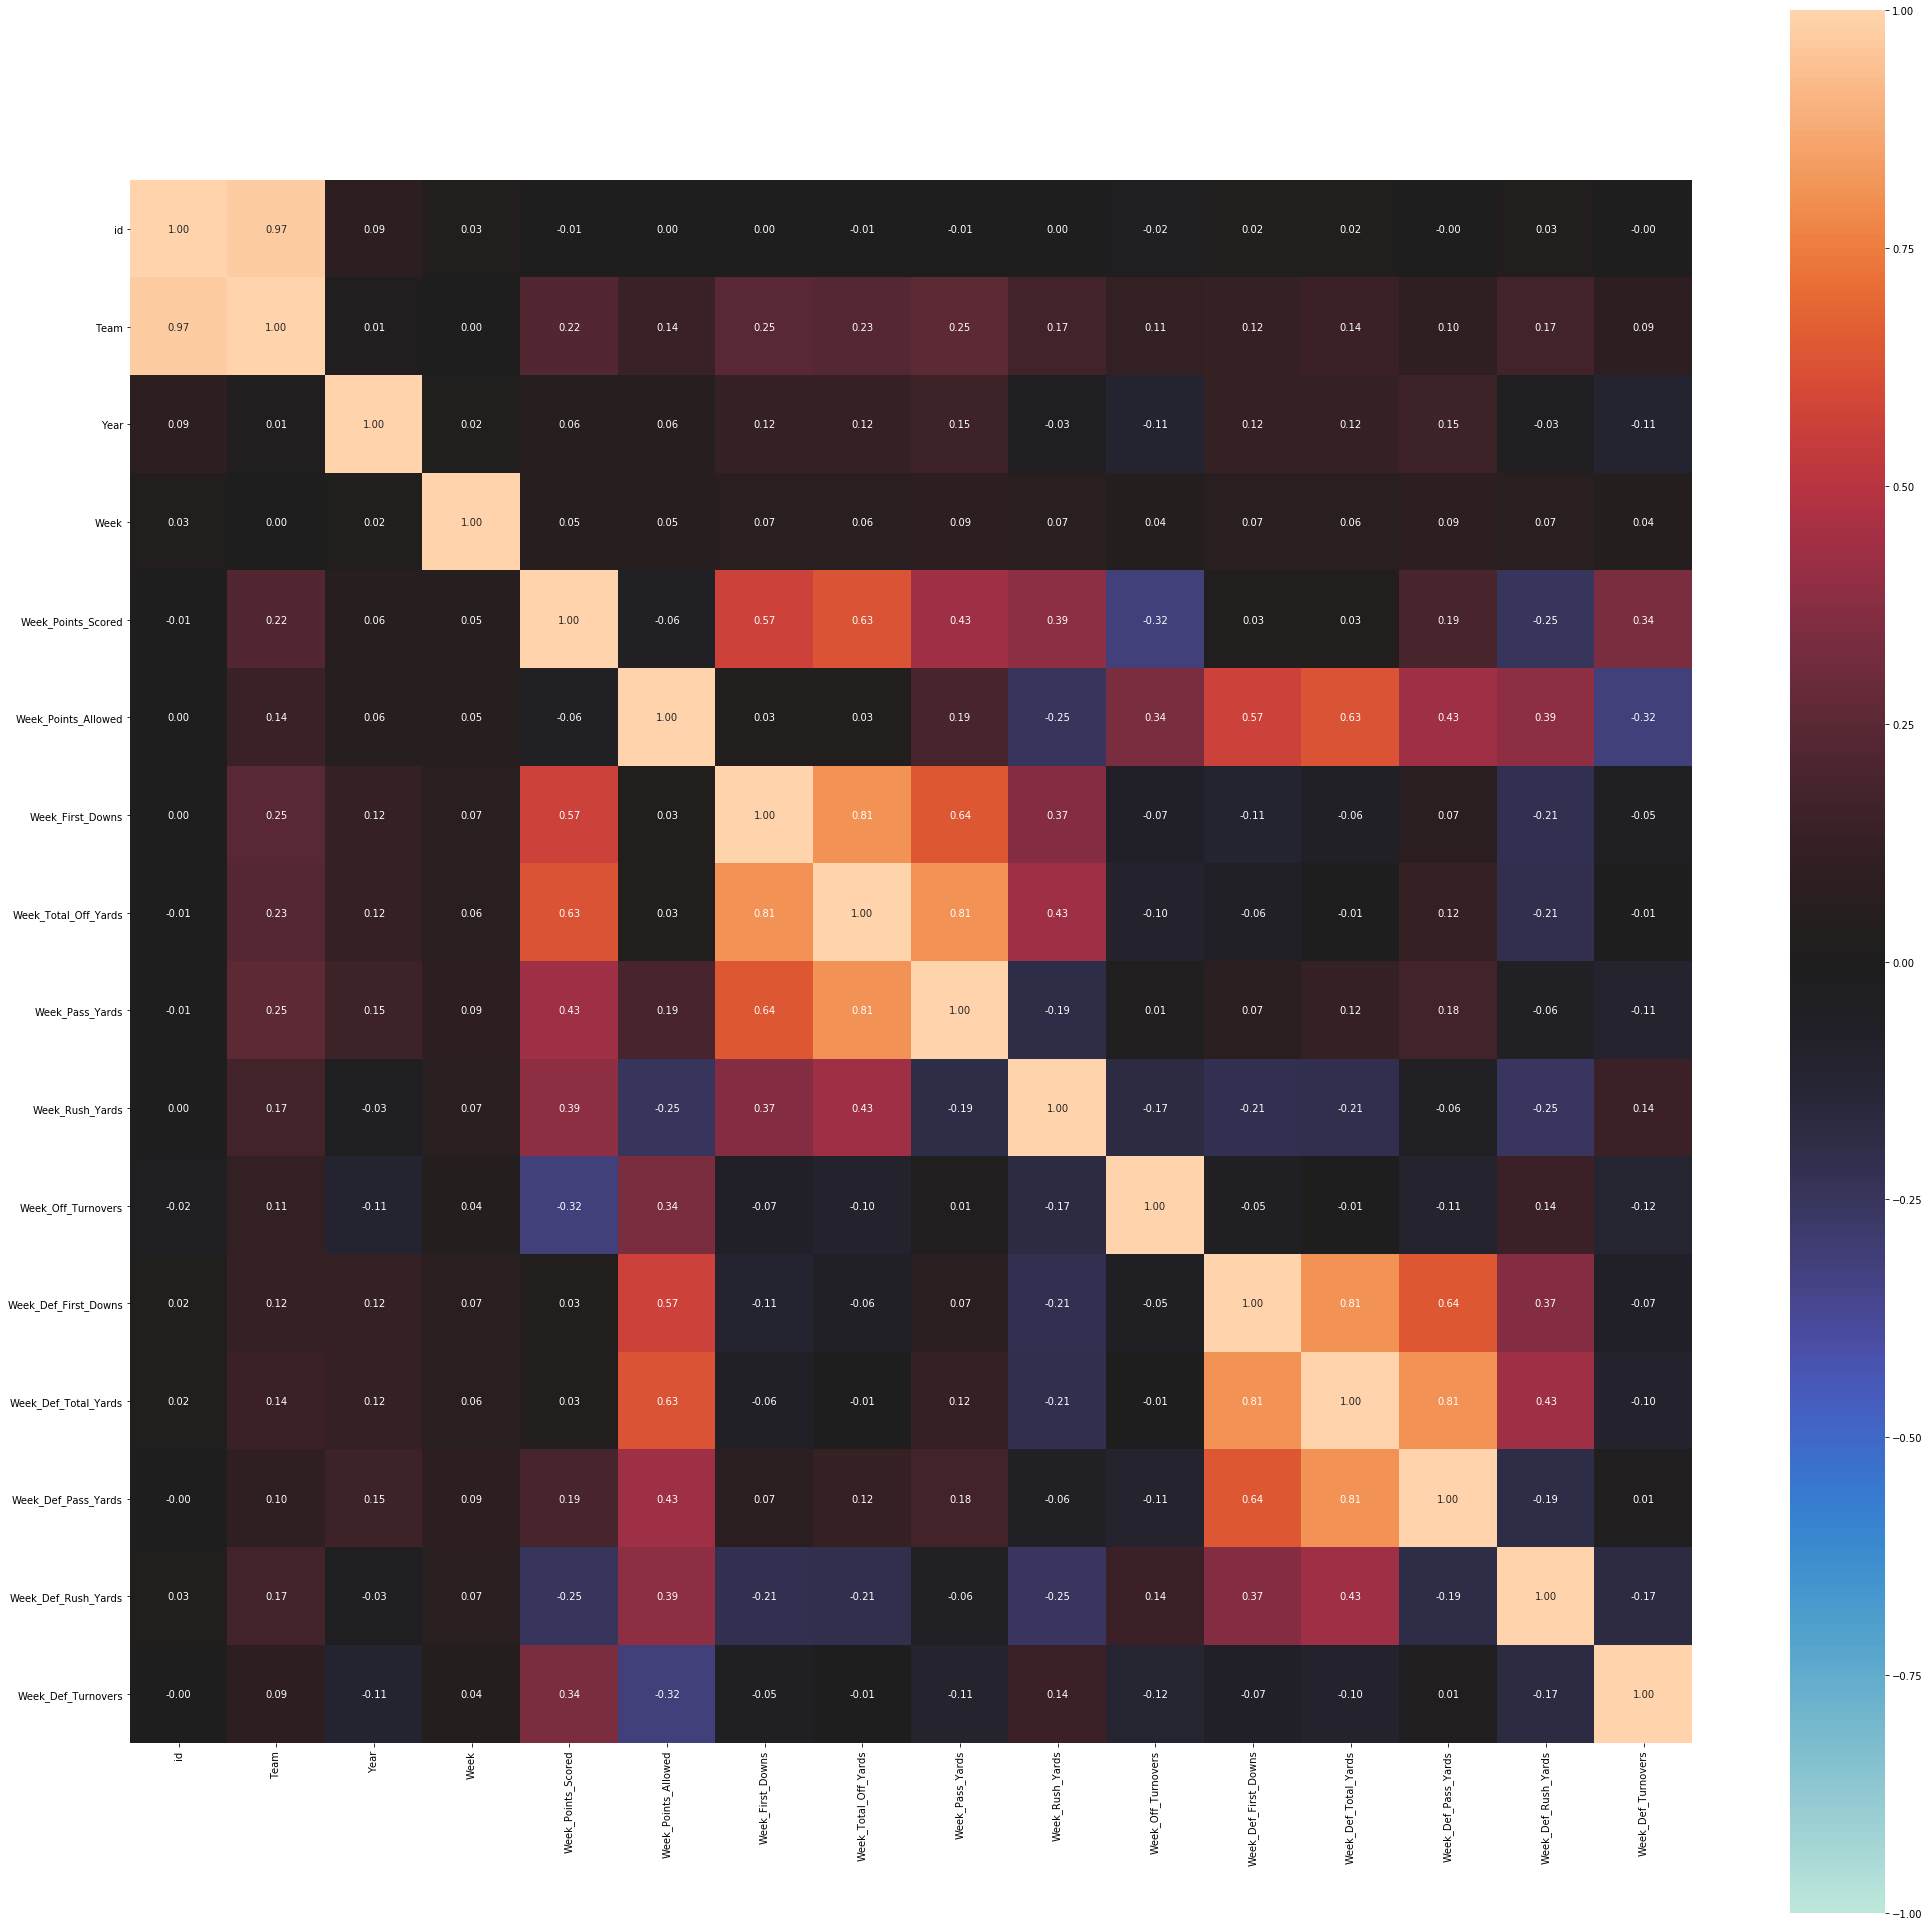

{'corr':                             id      Team      Year      Week  \
 id                    1.000000  0.969196  0.093663  0.028428   
 Team                  0.969196  1.000000  0.014263  0.000000   
 Year                  0.093663  0.014263  1.000000  0.022417   
 Week                  0.028428  0.000000  0.022417  1.000000   
 Week_Points_Scored   -0.005100  0.220480  0.061025  0.052099   
 Week_Points_Allowed   0.003786  0.137198  0.061025  0.052099   
 Week_First_Downs      0.004549  0.245147  0.124832  0.069251   
 Week_Total_Off_Yards -0.008963  0.226741  0.117775  0.063704   
 Week_Pass_Yards      -0.012672  0.252159  0.148667  0.092213   
 Week_Rush_Yards       0.004443  0.168718 -0.031233  0.065031   
 Week_Off_Turnovers   -0.018914  0.113402 -0.113578  0.040594   
 Week_Def_First_Downs  0.016392  0.123424  0.124832  0.069251   
 Week_Def_Total_Yards  0.016111  0.142083  0.117915  0.063823   
 Week_Def_Pass_Yards  -0.002045  0.096895  0.148814  0.092341   
 Week_Def_Rush_Ya

In [122]:
associations(weeks, figsize=(35,35))

## What is the count of position types per round from 2002-2019

Text(0, 0.5, 'Position Pick Count')

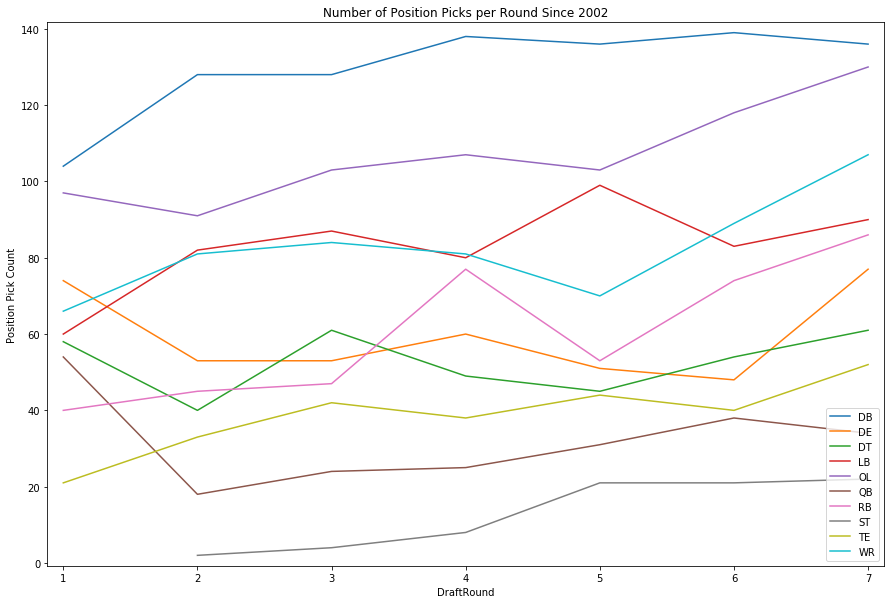

In [121]:
roundPosition = draft.groupby(['DraftRound', 'DraftPosition'])['DraftPlayer'].count().unstack().plot(figsize=(15,10))
plt.legend(loc='lower right')
plt.margins(0.02)
plt.title('Number of Position Picks per Round Since 2002')
plt.ylabel('Position Pick Count')

### How many players were selected in each position by year?

Text(0, 0.5, 'Position Pick Count')

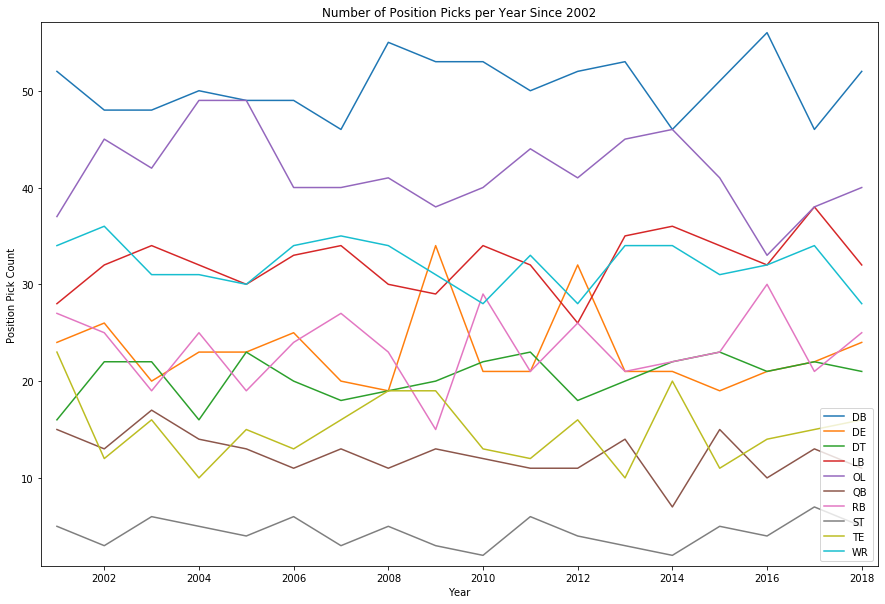

In [133]:
draft.groupby(['Year', 'DraftPosition'])['DraftPlayer'].count().unstack().plot(figsize=(15,10))
plt.legend(loc='lower right')
plt.margins(0.02)
plt.title('Number of Position Picks per Year Since 2002')
plt.ylabel('Position Pick Count')

What is the average number of years started by position, as well as the average games started by position by year

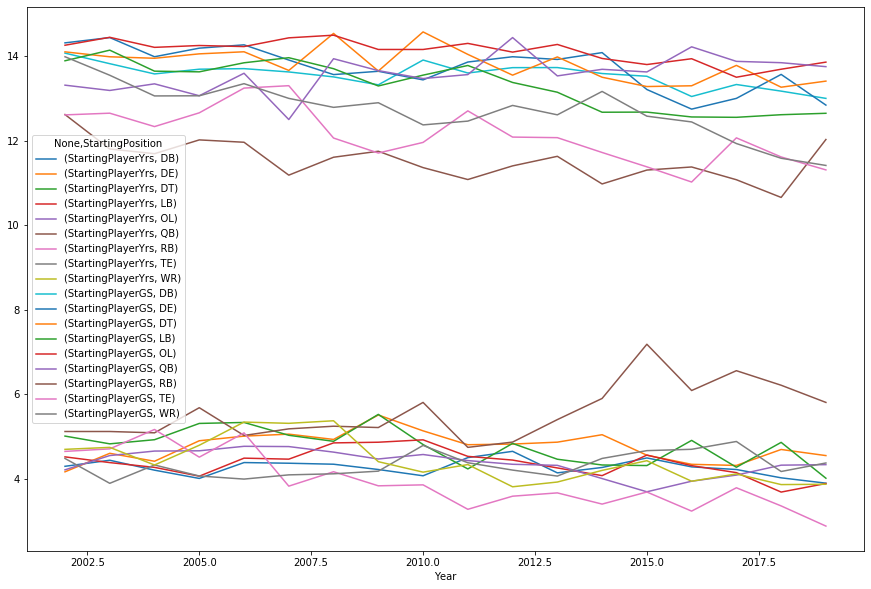

In [147]:
starters.groupby(['Year', 'StartingPosition'])['StartingPlayerYrs', 'StartingPlayerGS'].mean().unstack().plot(figsize=(15,10))

In [132]:
draft.groupby(['Year', 'DraftPosition']).count()

id  Team  DraftRound  DraftPick  DraftPlayer  DraftSchool  \
Year DraftPosition                                                              
2001 DB             52    52          52         52           52           52   
     DE             24    24          24         24           24           24   
     DT             16    16          16         16           16           16   
     LB             28    28          28         28           28           28   
     OL             37    37          37         37           37           37   
...                 ..   ...         ...        ...          ...          ...   
2018 QB             11    11          11         11           11           11   
     RB             25    25          25         25           25           25   
     ST              5     5           5          5            5            5   
     TE             16    16          16         16           16           16   
     WR             28    28          28         28           28           28   

                    DraftTeamSelection  
Year DraftPosition                      
2001 DB                             52  
     DE                             24  
     DT                             16  
     LB                             28  
     OL                             37  
...                                ...  
2018 QB                             11  
     RB                             25  
     ST                              5  
     TE                             16  
     WR                             28  

[180 rows x 7 columns]